In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
np.random.seed(42)

In [3]:
MeanVector = [0, 0]
CovMatrix = [[3.0, 1.8],
             [1.8, 1.5]]
SampleCount = 200

DataMatrix = np.random.multivariate_normal(MeanVector, CovMatrix, SampleCount)

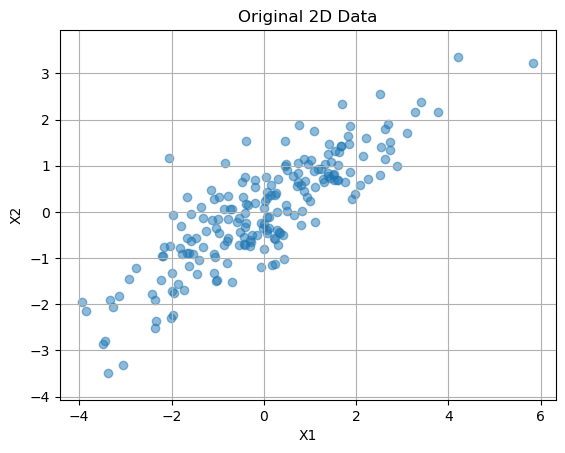

In [4]:
plt.scatter(DataMatrix[:, 0], DataMatrix[:, 1], alpha=0.5)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Original 2D Data")
plt.axis("equal")
plt.grid(True)
plt.show()

In [5]:
PcaModel = PCA(n_components=2)
PcaModel.fit(DataMatrix)

PrincipalComponents = PcaModel.components_
ExplainedVarianceRatio = PcaModel.explained_variance_ratio_

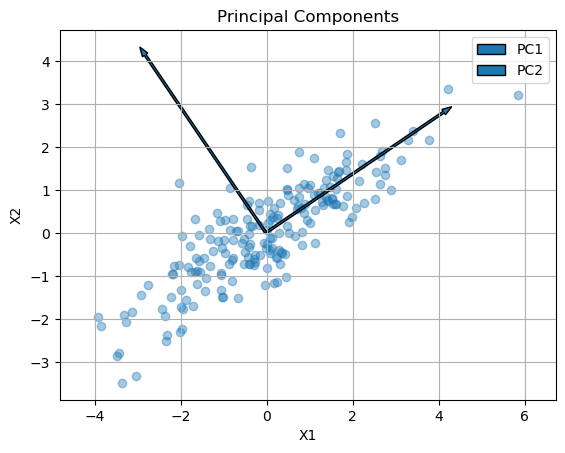

In [6]:
plt.scatter(DataMatrix[:, 0], DataMatrix[:, 1], alpha=0.4)

ScaleFactor = 5
for i, Component in enumerate(PrincipalComponents):
    plt.arrow(DataMatrix.mean(axis=0)[0], DataMatrix.mean(axis=0)[1],
              Component[0]*ScaleFactor, Component[1]*ScaleFactor,
              width=0.05, label=f"PC{i+1}")

plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Principal Components")
plt.legend()
plt.axis("equal")
plt.grid(True)
plt.show()


In [7]:
print("Principal Components (Loadings):")
for PCIndex, Component in enumerate(PrincipalComponents):
    print(f"PC{PCIndex+1}: {Component}")

print("\nExplained Variance Ratio:")
for PCIndex, Variance in enumerate(ExplainedVarianceRatio):
    print(f"PC{PCIndex+1}: {Variance:.3f}")

Principal Components (Loadings):
PC1: [0.8274788  0.56149696]
PC2: [-0.56149696  0.8274788 ]

Explained Variance Ratio:
PC1: 0.932
PC2: 0.068


In [8]:
PcaReducer = PCA(n_components=1)
ReducedData = PcaReducer.fit_transform(DataMatrix)

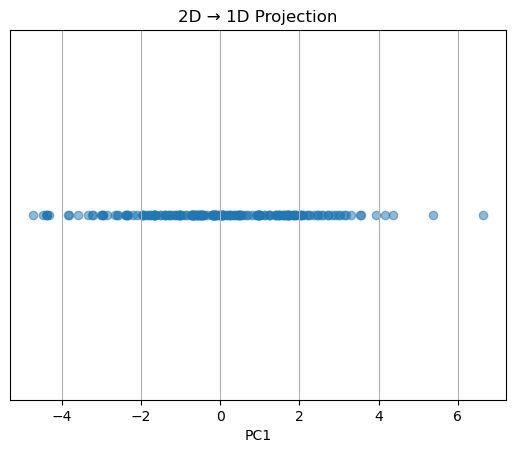

In [9]:
plt.scatter(ReducedData[:, 0], np.zeros_like(ReducedData), alpha=0.5)
plt.xlabel("PC1")
plt.yticks([])
plt.title("2D → 1D Projection")
plt.grid(True)
plt.show()

In [10]:
ReconstructedData = PcaReducer.inverse_transform(ReducedData)


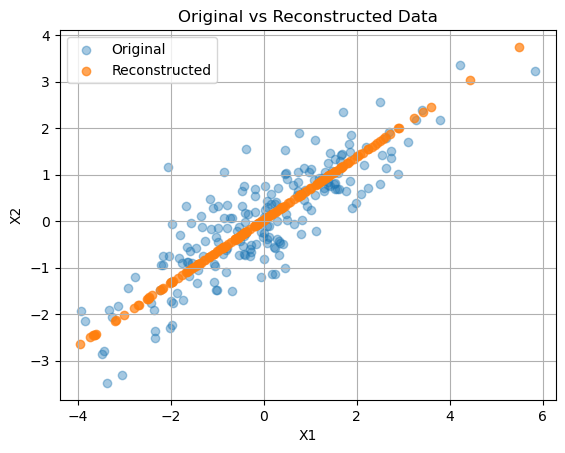

In [11]:
plt.scatter(DataMatrix[:, 0], DataMatrix[:, 1], alpha=0.4, label="Original")
plt.scatter(ReconstructedData[:, 0], ReconstructedData[:, 1], alpha=0.7, label="Reconstructed")
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Original vs Reconstructed Data")
plt.legend()
plt.axis("equal")
plt.grid(True)
plt.show()
